# INFO 2950 Final Project: The Suicide Epidemic # 
#### Joanna Li ####

## Introduction ##


In recent years, the national suicide rate in America has skyrocketed, increasing by more than 25% from 1999 to 2016. Currently, a suicide occurs roughly once every 12 minutes, taking lives at epidemic-level proportions. Despite the severity of this growing issue, the Suicide Epidemic is often left in the shadows, generating very little news coverage or attention, except when a celebrity is directly impacted. 

Although suicide is often perceived as the result of mental health issues, a CDC study found that 54% of Americans who died by suicide had no history of mental health problems. As such, there may be a number of other factors impacting the lives of Americans that are leading to the loss of so many lives. 

**Research Questions:** 

This analysis aims to assess potential associations between suicide rate and parameters that reflect economic, social, and technological conditions within the US. The six parameters evaluated alongside the national suicide rate were the percentage of Americans using the Internet, GDP per Capita, average number of annual hours worked, percentage of GDP devoted to social spending, unemployment rate, and Gini's Index for income inequality.

**Findings:**

Overall, I found that social spending is the strongest predictors of suicide rate from the chosen parameters. As social spending increased, suicide rate also increased in linear fashion. 


In [660]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import seaborn as sns
sns.set_style("white")

## Datasheet ##

**What are the Observations (rows) and Attributes (columns)?** 

The rows represent different parameters for the years spanning 1985-2015 in the United States. There are 21 instances in the dataframe but there exist data for years prior and after the selected years. These years were selected because they presented the robust, complete data across all the parameters. 

The attributes are as follows: 

* `Suicide_Rate` :  The number of suicides per 100,000 people in the US in a single year. 
* `Internet_Usage` : The percentage of individuals in America using the internet. 
* `GDP_Per_Capita` : A measure of the US's economic output that takes into account the US population. 
* `Average_Annual_Hours_Worked` : The total number of hours worked (including full-time, part-time and part-year workers, paid and unpaid overtime) by all employed Americans divided by the number of employed Americans. 
* `Social_Spending` : The percentage of the US GDP spent on cash benefits, direct in-kind provision of goods and services, and tax breaks with social purposes. The expenditures are mostly targeted towards the low-income households, the elderly, disabled, sick, unemployed, or young persons. 
* `Unemployment_Rate` : The percentage of people aged 16 and older without jobs who are currently in the labor force. 
* `Gini_Index` : A measure of the distribution of income across income percentiles in a population. A higher Gini Index score indicates greater inequality. 

Since the attributes presented are all publicly available, national level data, there is minimal risk for sensitive or confidential information being disclosed. 

In [689]:
us = pd.read_csv("final_us.csv")
us.head()

,Year,Suicide_Rate,Internet_Usage,GDP_Per_Capita,Average_Annual_Hours_Worked,Social_Spending,Unemployment_Rate,Gini_Index
0,1995,12.4,9.237088,28657.512716,1839.0,15.060,5.591667,0.433
1,1996,12.1,16.419353,29932.157767,1840.0,14.855,5.408333,0.437
2,1997,11.9,21.616401,31424.438925,1844.0,14.427,4.941667,0.440
3,1998,11.7,30.093197,32817.981996,1842.0,14.491,4.500000,0.439
4,1999,11.1,35.848724,34477.972133,1839.0,14.230,4.216667,0.441


**Why was this dataset created?** 

This dataset was created to perform an exploratory analysis of any potential associations between the rate of suicide in the United States and changing economic, social, and technological factors. This exploration is especially salient given the rising rates of suicide. 

**Who funded the creation of the dataset?** 

Most of the data in the dataset is sourced from the OECD (Organisation for Economic Co-operation and Development), which is a intergovernmental economic organization comprised of a number of countries. The Internet data is from the World Bank and the unemployment data is from the Bureau of Labor Statistics. The income inequality data is from the US Census. All the organizations the data is sourced from are US government affliliated national or international organizations. Their incentives are to provide accurate pictures of various metrics within the United States for the purposes of informing policy-makers, politians, researchers, and many other groups of people. 

**What processes might have influenced what data was observed and recorded and what was not?** 

Processes that might have influenced the data observed is the ways the data is classified. For example, when counting suicide numbers, there's potential for undercounting or miscounting which could affect the overall data. Additionally, for parameters like "hours worked", the official hours counted can misrepresent the amount of total time required to be a working person like commuting time and unofficial working hours. 

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data collected came from official datasets published by the OECD on the different parameters for many countries all over the world. On their official website, I was able to filter the data so I only pulled out data from 1985 - 2015 in a csv file. The downloaded csv file contained data for many countries, so I filtered the table to only select the rows where the location was the United States using indexing. I performed this to gather all seven parameters from the different websites. After this step, I inspected the data to look for any missing values or duplicate rows. In the Income Inequality table, I located a duplicate row so I removed it from the dataframe using a drop function. 

At this point, I had seven separate dataframes that contained information on each of the attributes of interest over the given time frame (1995-2015). In each of the dataframes, I renamed the columns using the rename function in order to facilitate consistency in the final table. Finally, I used the merge function to combine the six different dataframes into a final dataframe. By merging on the year column, the final dataframe contained the six parameter values of interest for each year. 

After that, I just pulled out the relevant USA data from the larger datasets and merged the different parameter dataframes into a final dataframe. By merging on the year column, the final data table contained all seven attributes for ever year of interest. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Since the data collected is on a national scale, it's very possible that the individuals involved were not aware that this data was being collected. For example, workers or people using the internet probably did not consider that their activity would be counted towards a national statistic directly. However, given that individual identifiers were not collected, the risk of privacy issues is very low. 

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** 
https://drive.google.com/drive/folders/10gpD_Vq7Wp7doKKtOp3yEG5DavWl7n4z?usp=sharing


## Data Analysis ##

### I. Data Overview ###

**Let's begin by taking a look at suicide rates in the US over time.** Below is a visualization of the US National suicide rate from the years 1995-2015. 

In [691]:
#Assigning variable names to parameters for ease of use 
year = us["Year"]
suicides = us["Suicide_Rate"]
internet = us["Internet_Usage"]
gdp = us["GDP_Per_Capita"]
work = us["Average_Annual_Hours_Worked"]
social = us["Social_Spending"]
unemployment = us["Unemployment_Rate"]
inequality = us["Gini_Index"]

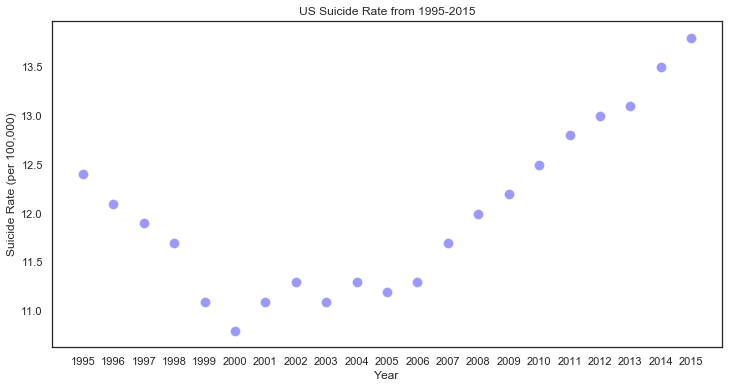

In [584]:
#Plotting Suicide Rates Over Time
plt.figure(figsize=(12,6))
sns.scatterplot(x = year, y = suicides, 
            color = 'blue', alpha=0.4, s=100)
plt.xticks(np.arange(1995, 2016, 1))
plt.ylabel("Suicide Rate (per 100,000)")
plt.title("US Suicide Rate from 1995-2015")
plt.show()

As you can see, the suicide rate has risen significantly from 1995 to 2015. Although there was a dip from 1999 to 2005, the rate has been significantly and consistently rising from 2006 onward. This trend is consistent with the notion of the Suicide Epidemic, as cases of suicide have been increasing steadily in recent years. 

In [573]:
print("Mean: ", suicides.mean())
print("Standard Deviation: ", suicides.std())

Mean:  11.995238095238093
Standard Deviation:  0.8651451846228995


The average suicide rate between the years 1995 to 2015 is 12 suicides per 100,000 people. Given the United States' population, this would amount to over 39,000 deaths from suicide per year. The standard deviation is 0.87. 

**Now, let's examine the other attributes relating to the economic, social, and technological conditions in the US.**

I am first going to check the correlation coefficient between each pair of parameters to ensure that I do not evaluate any parameters whose variation can be completely accounted for by another parameter.

In [629]:
#Checking correlation coefficients between parameters
a = np.corrcoef(internet, gdp)
print("Internet Usage and GDP: ", a[0,1]) 

b = np.corrcoef(internet, work)
print("Internet Usage and Hours Worked: ", b[0,1]) 

c = np.corrcoef(internet, social)
print("Internet Usage and Social Spending: ", c[0,1]) 

d = np.corrcoef(internet, unemployment)
print("Internet Usage and Unemployment Rate: ", d[0,1]) 

k = np.corrcoef(internet, inequality)
print("Internet Usage and Income Inequality: ", k[0,1]) 

e = np.corrcoef(gdp, work)
print("GDP and Hours Worked: ", e[0,1]) 

f = np.corrcoef(gdp, social)
print("GDP and Social Spending: ", f[0,1]) 

g = np.corrcoef(gdp, unemployment)
print("GDP and Unemployment Rate: ", g[0,1]) 

l = np.corrcoef(gdp, inequality)
print("GDP and Income Inequality: ", l[0,1]) 

h = np.corrcoef(work, social)
print("Hours Worked and Social Spending: ", h[0,1]) 

i = np.corrcoef(work, unemployment)
print("Hours Worked and Unemployment: ", i[0,1]) 

m = np.corrcoef(work, inequality)
print("Hours Worked and Income Inequality: ", m[0,1]) 

j = np.corrcoef(social, unemployment)
print("Social Spending and Unemployment: ", j[0,1]) 

n = np.corrcoef(social, inequality)
print("Social Spending and Income Inequality: ", n[0,1]) 

o = np.corrcoef(unemployment, inequality)
print("Unemployment and Income Inequality: ", o[0,1]) 

Internet Usage and GDP:  0.9133748534194729
Internet Usage and Hours Worked:  -0.9228030284052615
Internet Usage and Social Spending:  0.7120046678907552
Internet Usage and Unemployment Rate:  0.4425727912374913
Internet Usage and Income Inequality:  0.8147569822641644
GDP and Hours Worked:  -0.885522952882626
GDP and Social Spending:  0.8591486175384606
GDP and Unemployment Rate:  0.4901923405664773
GDP and Income Inequality:  0.9312902790433392
Hours Worked and Social Spending:  -0.8582046122779547
Hours Worked and Unemployment:  -0.7012009113747593
Hours Worked and Income Inequality:  -0.8474700671395394
Social Spending and Unemployment:  0.8263103877928696
Social Spending and Income Inequality:  0.9080768528485779
Unemployment and Income Inequality:  0.6265959022228568


Out of all the potential pairs of parameters, some pairs have correlations coefficients whose absolute values are somewhat close to 1 such as 0.93 between GDP and Income Inequality. This indicates that there is a fairly strong positive correlation between the two parameters. However, since there are no values extremely close to 1, this indicates there are no perfect linear relationships between parameters. This tells me that there are no parameters that are completely redundant so I will evaluate all of them in my analysis. 

**Let's visualize the shape of the parameter data over time.** 

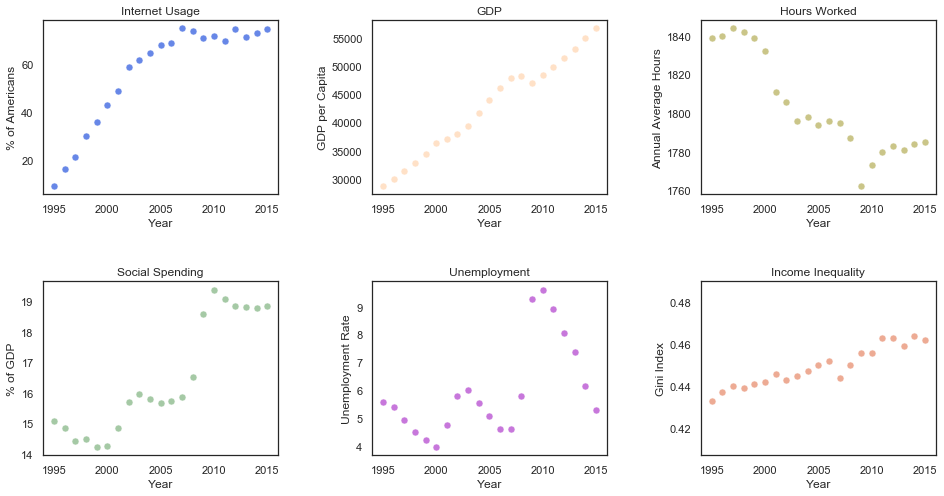

In [587]:
#Creating subplots to visualize parameters over time
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=.5, wspace=.4)

plt.subplot(2,3,1)
sns.scatterplot(x = year, y = internet, color= "royalblue", alpha=0.8, s=50)
plt.title("Internet Usage")  
plt.ylabel("% of Americans")

plt.subplot(2,3,2)
sns.scatterplot(x = year, y = gdp, color= "peachpuff", alpha=0.8, s=50)
plt.title("GDP")  
plt.ylabel("GDP per Capita")

plt.subplot(2,3,3)
sns.scatterplot(x = year, y = work, color= "darkkhaki", alpha=0.8, s=50)
plt.title("Hours Worked") 
plt.ylabel("Annual Average Hours")

plt.subplot(2,3,4)
sns.scatterplot(x = year, y = social, color= "darkseagreen", alpha=0.8, s=50)
plt.title("Social Spending")
plt.ylabel("% of GDP")

plt.subplot(2,3,5)
sns.scatterplot(x = year, y = unemployment, color= "mediumorchid", alpha=0.8, s=50)
plt.title("Unemployment") 
plt.ylabel("Unemployment Rate")

plt.subplot(2,3,6)
sns.scatterplot(x = year, y = inequality, color= "darksalmon", alpha=0.8, s=50)
plt.title("Income Inequality")
plt.ylabel("Gini Index")

plt.show()

Upon visual assessment, these scatter plots appear to have different trends over time. While internet usage, GDP, and income inequality appear to have steadily risen over time, social spending and unemployment have experienced peaks and dips with an overall positive trend. In contrast, hours worked has decreased over time. These trends are interesting to keep note of as we move into evaluating these parameters as predictors of suicide rate. 

**Next, I'll plot the parameters against suicide rates to get a visual depiction of any potential relationships.**

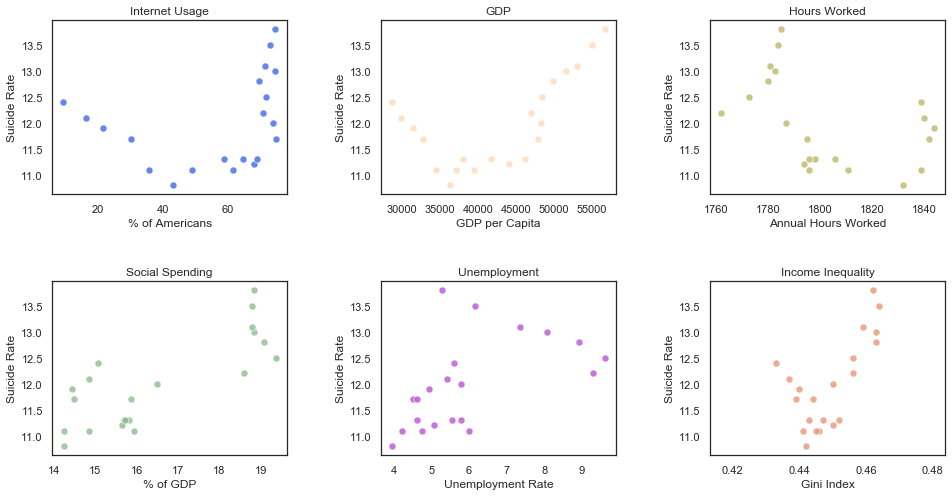

In [588]:
#Creating subplots to visualize potential relationship between parameters and suicide rate
fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(hspace=.5, wspace=.4)

plt.subplot(2,3,1)
sns.scatterplot(y = suicides, x = internet, color= "royalblue", alpha=0.8, s=50)
plt.title("Internet Usage")  
plt.ylabel("Suicide Rate")
plt.xlabel("% of Americans")

plt.subplot(2,3,2)
sns.scatterplot(y = suicides, x = gdp, color= "peachpuff", alpha=0.8, s=50)
plt.title("GDP")  
plt.ylabel("Suicide Rate")
plt.xlabel("GDP per Capita")

plt.subplot(2,3,3)
sns.scatterplot(y = suicides, x = work, color= "darkkhaki", alpha=0.8, s=50)
plt.title("Hours Worked") 
plt.ylabel("Suicide Rate")
plt.xlabel("Annual Hours Worked")

plt.subplot(2,3,4)
sns.scatterplot(y = suicides, x = social, color= "darkseagreen", alpha=0.8, s=50)
plt.title("Social Spending")
plt.ylabel("Suicide Rate")
plt.xlabel("% of GDP")

plt.subplot(2,3,5)
sns.scatterplot(y = suicides, x = unemployment, color= "mediumorchid", alpha=0.8, s=50)
plt.title("Unemployment") 
plt.ylabel("Suicide Rate")
plt.xlabel("Unemployment Rate")

plt.subplot(2,3,6)
sns.scatterplot(y = suicides, x = inequality, color= "darksalmon", alpha=0.8, s=50)
plt.title("Income Inequality")
plt.ylabel("Suicide Rate")
plt.xlabel("Gini Index")

plt.show()

Visually inspecting the plots, there appears to be somewhat of a positive correlation between internet usage, GDP, social spending, and income inequality with suicide rate. Unemployment appears to be somewhat scattered and random, while annual hours worked appears to have a negative correlation with suicide rate. 

### II. Linear Regression Models ###

**In order to investigate any potential associations further, I will generate linear regression models for each of the six parameters.** These models will help me better evaluate if there exists a linear relationship between each of the parameters and suicide rates.

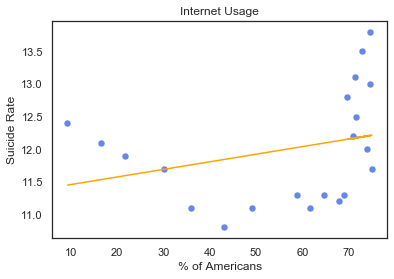

Regression Slope: [0.01163825]
Coefficient of Determination:  0.08340535420564843


In [626]:
#Internet Usage Linear Regression
#Creating a Linear Regression and Predicted y-values 
internet_model = LinearRegression().fit(us[["Internet_Usage"]], us["Suicide_Rate"]) 
predicted_y = internet_model.predict(us[["Internet_Usage"]])

#Plotting the Data and Linear Regression Line
sns.scatterplot(y = suicides, x = internet, color= "royalblue", alpha=0.8, s=50)
plt.title("Internet Usage")  
plt.ylabel("Suicide Rate")
plt.xlabel("% of Americans")
plt.plot(us[["Internet_Usage"]], predicted_y, color="orange")
plt.show()

#Finding and Displaying the Regression Slope and Coefficient of Determination 
internet_slope = internet_model.coef_
internet_score = internet_model.score(us[["Internet_Usage"]], us["Suicide_Rate"])
print("Regression Slope:", internet_slope)
print("Coefficient of Determination: ", internet_score)

This linear regression model has a slope of 0.01, indicating a positive relationship where for every additional percent of Americans using the internet, the suicide rate rises by 0.01 suicides per 100,000 people. The coefficient of determination for this regression model is 0.08, which indicates that the model predicts 8% of the variability in the suicide rate data. Since so little of the variability in output can be accounted for by this regression, a linear relationship is a poor model to explain the relationship between internet usage and suicide rate. 

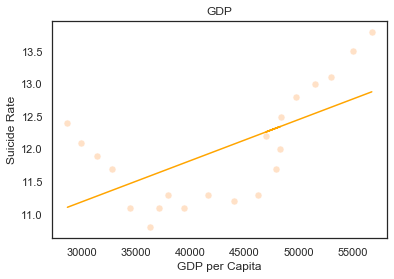

Regression Slope: [6.30810869e-05]
Coefficient of Determination:  0.39016456730653826


In [614]:
#GDP Linear Regression
gdp_model = LinearRegression().fit(us[["GDP_Per_Capita"]], us["Suicide_Rate"])
predicted_y = gdp_model.predict(us[["GDP_Per_Capita"]])

sns.scatterplot(y = suicides, x = gdp, color= "peachpuff", alpha=0.8, s=50)
plt.title("GDP")  
plt.ylabel("Suicide Rate")
plt.xlabel("GDP per Capita")
plt.plot(us["GDP_Per_Capita"], predicted_y, color="orange")
plt.show()

gdp_slope = gdp_model.coef_
gdp_score = gdp_model.score(us[["GDP_Per_Capita"]], us["Suicide_Rate"])

print("Regression Slope:", gdp_slope)
print("Coefficient of Determination: ", gdp_score)

This linear regression model has a slope of 6.31e-05, indicating a positive relationship where for every additional dollar in the GDP per capita, the suicide rate rises by 6.31e-05 suicides per 100,000 people. The coefficient of determination for this regression model is 0.39, which indicates that the model predicts 39% of the variability in the suicide rate data. This is an interesting finding because I believed that suicide rates would decline as GDP per capita rose since the country would be experiencing greater productivity and potentially wealth. However, we observe the opposite trend. 

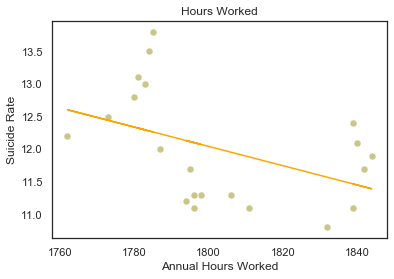

Regression Slope: [-0.01480363]
Coefficient of Determination:  0.19440244661650952


In [623]:
#Annual Hours Worked Linear Regression
work_model = LinearRegression().fit(us[["Average_Annual_Hours_Worked"]], us["Suicide_Rate"]) 
predicted_y = work_model.predict(us[["Average_Annual_Hours_Worked"]])

sns.scatterplot(y = suicides, x = work, color= "darkkhaki", alpha=0.8, s=50)
plt.title("Hours Worked") 
plt.ylabel("Suicide Rate")
plt.xlabel("Annual Hours Worked")
plt.plot(us[["Average_Annual_Hours_Worked"]], predicted_y, color="orange")
plt.show()

work_slope = work_model.coef_
work_score = work_model.score(us[["Average_Annual_Hours_Worked"]], us["Suicide_Rate"])

print("Regression Slope:", work_slope)
print("Coefficient of Determination: ", work_score)

This linear regression model has a slope of -0.01, indicating a slight negative relationship where for every additional average annual hour worked, the suicide rate falls by 0.01 suicides per 100,000 people. The coefficient of determination for this regression model is 0.19, which indicates that the model predicts 19% of the variability in the suicide rate data. This is an interesting finding because I believed that suicide rates would rise as annual hours work rose since individuals would be experiencing poorer work-life balance and more stress. However, we observe the opposite trend. 

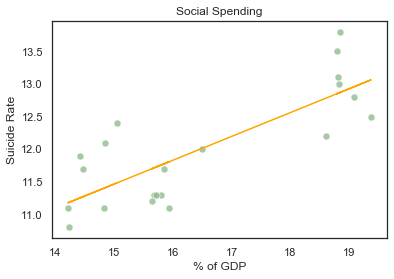

Regression Slope: [0.3673156]
Coefficient of Determination:  0.6307869516694035


In [621]:
#Social Spending Linear Regression
social_model = LinearRegression().fit(us[["Social_Spending"]], us["Suicide_Rate"]) 
predicted_y = social_model.predict(us[["Social_Spending"]])

sns.scatterplot(y = suicides, x = social, color= "darkseagreen", alpha=0.8, s=50)
plt.title("Social Spending")
plt.ylabel("Suicide Rate")
plt.xlabel("% of GDP")
plt.plot(us[["Social_Spending"]], predicted_y, color="orange")
plt.show()

social_slope = social_model.coef_
social_score = social_model.score(us[["Social_Spending"]], us["Suicide_Rate"])

print("Regression Slope:", social_slope)
print("Coefficient of Determination: ", social_score)

This linear regression model has a slope of 0.37, indicating a positive relationship where for every 1% rise in Social Spending as a percentage of GDP, the suicide rate rises by 0.36 suicides per 100,000 people. The coefficient of determination for this regression model is 0.63, which indicates that the model predicts 63% of the variability in the suicide rate data. This relationship makes sense because higher social spending may be indicative of greater societal welfare problems like lack of access to food or shelter. 

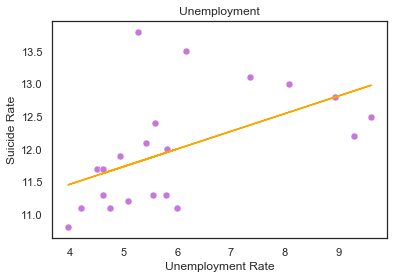

Regression Slope: [0.27116364]
Coefficient of Determination:  0.2793244568250828


In [624]:
#Unemployment Linear Regression Model
unemployment_model = LinearRegression().fit(us[["Unemployment_Rate"]], us["Suicide_Rate"]) 
predicted_y = unemployment_model.predict(us[["Unemployment_Rate"]])

sns.scatterplot(y = suicides, x = unemployment, color= "mediumorchid", alpha=0.8, s=50)
plt.title("Unemployment") 
plt.ylabel("Suicide Rate")
plt.xlabel("Unemployment Rate")
plt.plot(us[["Unemployment_Rate"]], predicted_y, color="orange")
plt.show()

unemployment_slope = unemployment_model.coef_
unemployment_score = unemployment_model.score(us[["Unemployment_Rate"]], us["Suicide_Rate"])

print("Regression Slope:", unemployment_slope)
print("Coefficient of Determination: ", unemployment_score)

This linear regression model has a slope of 0.27, indicating a slight positive relationship where for every rise by 1 in the unemployment rate, the suicide rate rises by 0.27 suicides per 100,000 people. The coefficient of determination for this regression model is 0.28, which indicates that the model predicts 28% of the variability in the suicide rate data. This relationship makes sense because higher unemployment may be indicative of greater financial-related stress. 

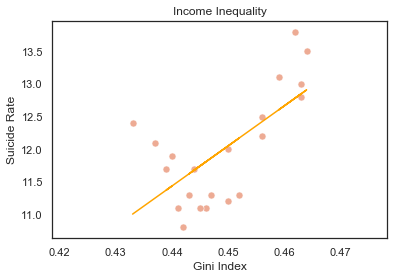

Regression Slope: [61.51807229]
Coefficient of Determination:  0.449643958196957


In [625]:
#Income Inequality Linear Regression Model
inequality_model = LinearRegression().fit(us[["Gini_Index"]], us["Suicide_Rate"]) 
predicted_y = inequality_model.predict(us[["Gini_Index"]])

sns.scatterplot(y = suicides, x = inequality, color= "darksalmon", alpha=0.8, s=50)
plt.title("Income Inequality") 
plt.ylabel("Suicide Rate")
plt.xlabel("Gini Index")
plt.plot(us[["Gini_Index"]], predicted_y, color="orange")
plt.show()

inequality_slope = inequality_model.coef_
inequality_score = inequality_model.score(us[["Gini_Index"]], us["Suicide_Rate"])

print("Regression Slope:", inequality_slope)
print("Coefficient of Determination: ", inequality_score)

This linear regression model has a slope of 61.51, indicating a positive relationship where for every rise in 1 on the Gini Index, the suicide rate rises by 61.51 suicides per 100,000 people. The coefficient of determination for this regression model is 0.45, which indicates that the model predicts 45% of the variability in the suicide rate data. This relationship makes sense because greater income inequality can generate toxic cultures within society. 

Given the regression models for the different parameters, the models were for social spending and income inequality, followed by GDP, because they had the largest coefficients of determination at 0.63, 0.45, and 0.39. This means that the relationships between these parameters and suicide rate is somewhat likely to be a linear. The next question that comes to mind from these findings is: how likely is it that the patterns just detected by the regression models are due to random chance? 

**Next, we will evaluate the significance of the linear regression models using random permutations.** These models are ordered by coefficient of determination of the model, starting with the strongest to the weakest. The value labeled "number of steeper slopes" refers to the number of models generated using the parameter and randomly jumbled suicide rate data that generated regression slopes larger than the actual regression model. The larger this value is, the more likely it is that the pattern seen in the actual data is due to random chance. 

In [630]:
def permuted_y():
    return np.random.permutation(us["Suicide_Rate"])

Coefficient of Determination:  0.6307869516694035
Number of Steeper Slopes:  0


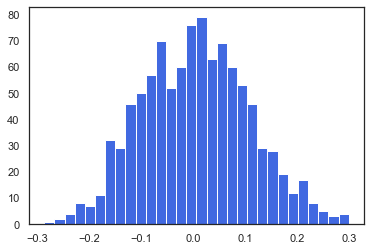

In [652]:
#Permutation for Social Spending 
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["Social_Spending"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(social_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", social_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30, color='royalblue')
plt.show()

Coefficient of Determination:  0.449643958196957
Number of Steeper Slopes:  0


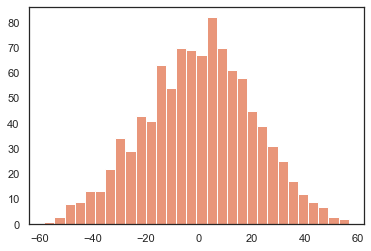

In [653]:
#Permutation for Income Inequality
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["Gini_Index"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(inequality_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", inequality_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30, color="darksalmon")
plt.show()

Coefficient of Determination:  0.39016456730653826
Number of Steeper Slopes:  3


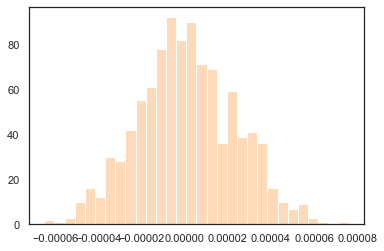

In [654]:
#Permutation for GDP per Capita
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["GDP_Per_Capita"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(gdp_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", gdp_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30,color="peachpuff")
plt.show()

Coefficient of Determination:  0.2793244568250828
Number of Steeper Slopes:  14


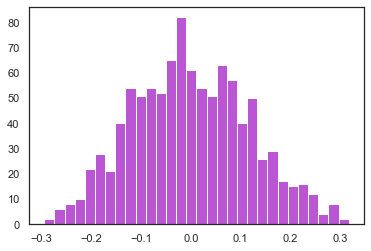

In [655]:
#Permutation for Unemployment Rate
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["Unemployment_Rate"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(unemployment_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", unemployment_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30, color="mediumorchid")
plt.show()

Coefficient of Determination:  0.19440244661650952
Number of Steeper Slopes:  57


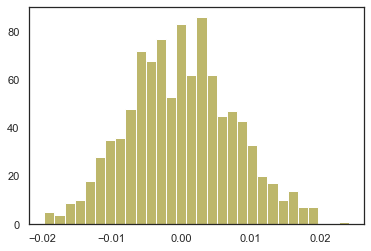

In [659]:
#Permutation for Annual Hours Worked 
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["Average_Annual_Hours_Worked"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(work_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", work_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30, color="darkkhaki")
plt.show()

Coefficient of Determination:  0.08340535420564843
Number of Steeper Slopes:  202


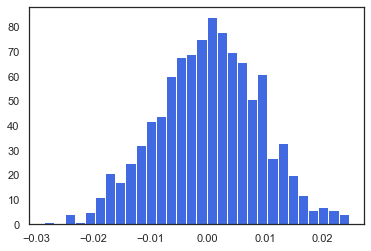

In [658]:
#Permutation for Internet Usage 
fake_slopes = np.zeros(1000)

steeper_slopes = 0
    
for i in range(1000):
    fake_y = permuted_y()
    permuted_model = LinearRegression().fit(us[["Internet_Usage"]], fake_y)
    fake_slope = permuted_model.coef_[0]
    fake_slopes[i] = fake_slope
    if np.abs(fake_slope) > np.abs(internet_slope):
        steeper_slopes += 1

print("Coefficient of Determination: ", internet_score)
print ("Number of Steeper Slopes: ", steeper_slopes)
plt.hist(fake_slopes, bins=30, color="royalblue")
plt.show()

From these permutations, we see that the stronger models are less likely to be due to random chance, with few to no permutations that have steeper slopes. The models for social spending, income inequality, and GDP all had less than 5 permutations with steeper slopes. That means out of 1000 arrangements of the data, few to none had steeper slopes than the actual data. As the linear regression model for the parameter weakens, the number of permutations with steeper slopes influences greatly. For internet usage in particular, there were over 202 permutations with steeper slopes. This makes it much more likely that we could have found the same relationship if the data were just randomly generated.

### III. Multiple Regression  Model ###

Since there were three parameters that had a higher likelihood of having a linear relationship with suicide rate, I conducted a multiple regression analysis to try to gain a clearer picture of the impact of each individual parameter. The three parameters used in the model are GDP, Social Spending, and Income Inequality. I am especially interested in further investigating GDP since it's linear regression model found that suicide rate decreased while GDP increased. The multiple regression model will evaluate the impact of GDP while accounting for differences in suicide rate due to social spending and income inequality. 

In [684]:
#Creating Multiple Regression Model with Inputs GDP, Social Spending, and Income Inequality 
multiple_model = LinearRegression().fit(us[["GDP_Per_Capita", "Social_Spending", "Gini_Index"]], us["Suicide_Rate"])

x = multiple_model.coef_

print("GDP per Capita Regression Slope: ", x[0])
print("Social Spending Regression Slope: ", x[1])
print("Income Inequality Regression Slope: ", x[2])
print()

multiple_model_score = multiple_model.score(us[["GDP_Per_Capita", "Social_Spending", "Gini_Index"]], us["Suicide_Rate"])
print("Coefficient of Determination: ", multiple_model_score)


GDP per Capita Regression Slope:  -1.0796545091130805e-05
Social Spending Regression Slope:  0.4924095601483096
Income Inequality Regression Slope:  -18.047024868552707

Coefficient of Determination:  0.6469232435515186


From the multiple regression model, we see that as GDP per capita increases, suicide rate actually has a negative regression slope. This may be due to the fact that social spending and income inequality are strong drivers for the increase in suicide rates, so the impact of GDP is actually not a factor that is causing the increase. Something interesting and unexpected is the very negative slope for the income inequality regression slope. This is unexpected because the linear regression model for income inequality had a large positive slope of 61.52. Social spending as a parameter still maintains a positive regression slope, indicating that increasing social spending is associated with increased suicide rates. 

Overall, this model has around the same coefficient of determination as the Linear Regression for social spending (0.63 vs 0.64), so it does not necessarily offer a much clearer look into the data. However, it does offer some clarity on the puzzling trend noted from the GDP linear regression and reaffirms social spending as the strongest predictor. 

## Conclusion ##

**Conclusion** 
Through the process of data analysis, social spending was determined to be the strongest predictor of suicide rate in the US. By creating a linear regression model, it was predicted that for every additional percentage of GDP of social spending, suicide rate increased by 0.37 deaths per 100,000 people. I am somewhat confident in this linear relationship because the linear regression accounted for 63% of the variation in the output variable. Since the issue of suicide is very nuanced and can have many causal factors, a coefficient of determination of 0.63 is considered positive. This positive association stayed consistent in the multiple regression model as well. 

The other six parameters displayed no compelling evidence of a linear relationship with the exception of income inequality and GDP. In the linear regression models, income inequality was positively correlated with suicide rate while GDP was negative correlated. However, when evaluated alongside social spending in the multiple regression model, they both flipped from a positive association to a negative association. This suggests that more detailed investigation is required to obtain a true understanding of the impact of these variables. 

In context, an indicator like social spending could very well reflect the factors going on in people's lives that could lead to suicide like homelessness and poverty. However, increases in social spending also may not necessarily represent need. Instead, they can represent the social policies and politics at the time. For this reason, it would be unwise to consider social spending as a definitive predictive value. 

**Future Steps** 
When conducting my analysis, I quickly came across many issues that can be addressed in further research. The primary problem in this analysis was the ability of the indicator to successfully represent the circumstance of interest. For example, the parameter on internet usage may not accurately reflect the number of Americans experiencing social isolation due to reliance on technology. Therefore, further analyses should use more robust parameters when evaluating possible associations. It is important to acknowledge that since suicide is a very nuanced topic, there is lots of information that cannot be captured by statistics. Quantitative data should be supplemented with qualitative data to gain a holistic understanding of where the risk factors may lie. 

An area of further research I would be interested in is an analysis of the demographics impacted by the suicide epidemic. Since America is an incredibly diverse country, there may be different groups affected for different reasons. A stronger analysis could be generated by investigating associations between different gender, race, and age groups and the parameters of interest. Another interesting study would be comparing the United States' social, economic, and technologic circumstances to that of other countries, and the respective suicide rates. This would allow for identification of circumstances unique to the US that could be sparking the epidemic. Additionally, it can further strengthen any potential associations if they are consistent in other countries. 

## Source Code ##

Available here: https://github.com/jl2886/INFO2950-Final_Project

## Acknowledgements ##

There are many people I would like to thank for making my first foray into data science so positive. 

First is all the people who worked to collect, clean, and make available data for the public to use. 
https://data.worldbank.org/indicator/IT.NET.USER.ZS?end=2017&locations=US&name_desc=true&start=1990&view=chart
https://data.oecd.org/healthstat/suicide-rates.htm
https://data.bls.gov/pdq/SurveyOutputServlet 
https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-inequality.html

Next is those who contribute to online learning resources and packages like seaborn! 
https://python-graph-gallery.com/191-custom-axis-on-matplotlib-chart/
https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
https://seaborn.pydata.org/tutorial/color_palettes.html
https://stackoverflow.com/questions/48429156/how-to-resize-matplotlib-scatter-plot

and finally, the entire INFO 2950 community. Thank you to Professor Mimno, my project TA Gia Yao, my section TA Irena Papst, and all the other TAs who made this class such a fantastic learning experience! Your passion and compassion made this otherwise crazy semester a little brighter and is one of the reasons I'm going to miss Cornell. 
